In [6]:

import numpy as np
from sklearn.preprocessing import StandardScaler,normalize
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from collections import namedtuple, Counter, defaultdict
from math import log,ceil,sqrt

from sklearn import metrics
from math import exp,log10
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import csv

In [7]:
def plot_confusion_matrix(Y_actual,Y_predicted):
    conf_matrix =  metrics.confusion_matrix(Y_actual,Y_predicted)
    sns.heatmap(conf_matrix, annot=True,  fmt='')

In [8]:
####function to normalize the data##

def norm(Z):
    mean = np.sum(Z,axis=0)/len(Z)
    var = []
    for i in range(Z.shape[1]):
        sum1 = 0
        for j in range(Z.shape[0]):
            sum1 += (Z[j,i] - mean[i])**2
        var.append(1. *sum1/len(Z))

    for i in range(Z.shape[1]):
        for j in range(Z.shape[0]):
            Z[j,i] = (Z[j,i] - mean[i])/sqrt(var[i])
    
    
    
            
    return Z

In [9]:

def accuracy(Y,Y_hat):
                
    sum1 = sum([1 for i in range(len(Y)) if Y[i] == Y_hat[i]])
    return (1.0*sum1/len(Y))*100

<class 'numpy.ndarray'>
[[ -2.86412480e-01   4.18085780e-01  -1.11026312e-03   1.01863307e-01
    6.06415114e-01  -5.56291881e-04   1.02764931e-01  -9.81055026e-02
   -3.70475535e-01  -2.69517624e-01   2.97319448e-01  -2.15685035e-01
    7.68931624e-03]
 [ -1.11851050e-01  -4.52169817e-01   4.62665878e-01   2.61633515e-01
   -2.72616620e-02  -1.31563296e-01   5.49455212e-01   4.85384408e-02
    1.76472086e-01  -2.35707305e-01   1.29797785e-01  -2.72166933e-01
    2.42537421e-02]
 [ -2.85150133e-01  -1.46087187e-01  -4.13561677e-01   3.32325555e-01
    1.07426511e-01  -5.01950906e-02   3.59196082e-01  -4.40445294e-01
    5.12373485e-02   4.41091076e-01  -4.63254265e-03   2.80753552e-01
   -5.26297760e-02]
 [ -1.65671403e-01   3.77153651e-01   3.54447382e-01  -1.76899460e-01
   -2.62484985e-01  -1.24312760e-01   1.30494274e-01   2.66645392e-02
    8.31897891e-02   3.54143809e-01   4.50391856e-01   2.28792154e-01
    4.28664099e-01]
 [ -9.10332303e-02   4.38510899e-01  -2.27631512e-01   2

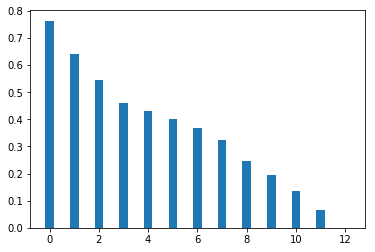

X's shape:  (303, 13)
Z's shape:  (303, 13)
Y's shape:  (303,)
[[-1.16272226  0.92962183  3.21234102 ..., -0.59612792  0.16422075
  -0.96657115]
 [-3.21783047  1.45102084 -0.48153238 ...,  1.05859135 -0.63134011
  -0.40367654]
 [-3.14360376 -0.63656877 -0.36430077 ...,  0.18565038 -1.00393091
  -0.68150469]
 ..., 
 [-1.87570429 -2.38177479 -0.16316278 ...,  1.28966971  0.41322839
  -0.1347603 ]
 [ 1.31332548  1.51469484 -0.14011541 ..., -0.07706784 -0.70312145
  -0.86318064]
 [ 2.60110963 -1.41284182  0.5870924  ...,  0.53654327  0.35423456
   0.32703919]]


In [24]:

data_txt =open("processed.cleveland.data1.txt","r") 
data = data_txt.read()
data = data.split('\n')[:-1]


X = []
Y = []
for i in data:
    
    x_1 = i.split(',')
    temp=map(float,x_1)
    x=tuple(temp)
   
    
    Y.append(float(x[len(x)-1]))
    x = x[0:len(x)-1]   
    
        
    #print type(i)
    X.append(x)
    
X = np.array(X)

Y = np.reshape(np.array(Y),(len(Y),))
Y[Y > 0] = 1 ###changing the lables to 0 and 1

for i in range(X.shape[1]): #####imputing the missing values with mode of the feature
    m =  mode(X[:,i])[0][0]
    for j in range(X.shape[0]):
        if X[j][i] == -9:
            X[j][i] = m


X_norm = norm(X.copy())##normalizing the data

cov_matrix = np.dot(np.transpose(X_norm),X_norm)
eigen= np.linalg.eig(cov_matrix)
eigen_val = eigen[0]
#print eigen_val
eigen_vec = eigen[1]
print( type(eigen_vec))
print (eigen_vec)
print (eigen_vec[0])
total_eigen_val = np.sum(eigen_val)
sum_d = []
for i in range(len(eigen_val)):
    sum_d.append(1. *np.sum(eigen_val[i+1:])/total_eigen_val)
width = 0.35
plt.bar(range(len(eigen_val)),sum_d,width)
plt.show()



W = eigen_vec[:,:]

Z = []
for i in X_norm:
    Z.append(np.dot(np.transpose(W),i))
Z = np.array(Z)

print ("X's shape: ", X.shape)
print ("Z's shape: ", Z.shape)
print ("Y's shape: ", Y.shape)
print(Z)

In [14]:
colnames = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg', 'thalach', 'exang','oldpeak','slope','ca','thal']
df = pd.DataFrame(data=X,columns=colnames)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [22]:
X.data

In [47]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# load the iris datasets

# fit a CART model to the data
model = DecisionTreeClassifier()
model.fit(Z[:170], Y[:170])
print(model)
# make predictions
expected = Y[150:]
predicted = model.predict(Z[150:])
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print ("Accuracy of the Decision Tree is: %s" %(accuracy(Y[150:]
                                                         ,predicted)))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
             precision    recall  f1-score   support

        0.0       0.77      0.85      0.81        81
        1.0       0.81      0.71      0.76        72

avg / total       0.79      0.78      0.78       153

[[69 12]
 [21 51]]
Accuracy of the Decision Tree is: 78.43137254901961
